# 2023 Ocean Extremes

This notebook uses data from NOAA and the National Snow and Ice Data Centre to plot the SST annual mean anomalies and Antarctic sea ice cover annual mean anomalies as well as the 2023 SST anomaly map.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
import cartopy.crs as ccrs
import cmcrameri as cm # Perceptually uniform colormap package: https://www.fabiocrameri.ch/colourmaps/ 

### Download 2023 SST from NOAA Climate Data Record. 

https://www.ncei.noaa.gov/products/optimum-interpolation-sst


In [3]:
!mkdir SSTNASA

In [4]:
%%time
# Download SST monthly files from https://www.ncei.noaa.gov/products/optimum-interpolation-sst
'''
The NOAA 1/4° Daily Optimum Interpolation Sea Surface Temperature (OISST) is a long term Climate 
Data Record that incorporates observations from different platforms (satellites, ships, buoys and 
Argo floats) into a regular global grid. The dataset is interpolated to fill gaps on the grid and 
create a spatially complete map of sea surface temperature. Satellite and ship observations are 
referenced to buoys to compensate for platform differences and sensor biases.

Anomalies (i.e., the daily OISST minus a 30-year climatological mean) represent departures from 
"normal" or average conditions. Computation of several climate indices, such as the El Niño index, 
utilize SST anomalies.
'''

year = 2023
months = np.arange(1,13)

dates = np.array([31,28,31,30,31,30,31,31,30,31,30,31])

for i in np.arange(len(months)):

    if months[i]<10:
        month = '0'+str(months[i])
    elif months[i] ==10:
        month = '10'
    elif months[i] ==11:
        month = '11'
    elif months[i] ==12:
        month = '12'
    
    for j in np.arange(1,dates[i]+1):
        if j < 10: 
            jstr = '0'+str(j)
        else:
            jstr = str(j)
        moda = month+jstr
        #print(moda)
        urlbase = 'https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/'
        url = urlbase +str(year)+month+'/oisst-avhrr-v02r01.'+str(year)+moda+'.nc'
        print('Downloading from '+url)
        filename = 'SSTNASA/oisst-avhrr-v02r01.'+str(year)+moda+'.nc'
        urlretrieve(url, filename)

CPU times: user 18.9 s, sys: 6.8 s, total: 25.7 s
Wall time: 24min 50s


### Having downloaded the data, let's process all the daily files it into one annually averaged array 

In [5]:
%%time

jan1 = xr.open_dataset('SSTNASA/oisst-avhrr-v02r01.20230101.nc').anom
SST_accum = xr.zeros_like(jan1).drop('time')
#notnandays = xr.zeros_like(jan1).drop('time')+365
for i in np.arange(len(months)):

    if months[i]<10:
        month = '0'+str(months[i])
    elif months[i] ==10:
        month = '10'
    elif months[i] ==11:
        month = '11'
    elif months[i] ==12:
        month = '12'
    
    for j in np.arange(1,dates[i]+1):
        if j < 10: 
            jstr = '0'+str(j)
        else:
            jstr = str(j)
        moda = month+jstr
        #print(moda)
        filename = 'SSTNASA/oisst-avhrr-v02r01.'+str(year)+moda+'.nc'
        print('Loading '+filename)
        SST_anom = xr.open_dataset(filename).anom.drop('time')
        SST_accum = SST_accum + SST_anom
#        notnandays = notnandays - np.isnan(SST_anom) #subtract days where there is a nan from 365. 
SST = SST_accum/365

Loading SSTNASA/oisst-avhrr-v02r01.20230101.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230102.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230103.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230104.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230105.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230106.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230107.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230108.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230109.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230110.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230111.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230112.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230113.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230114.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230115.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230116.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230117.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230118.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230119.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230120.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230121.nc
Loading SSTNA

Loading SSTNASA/oisst-avhrr-v02r01.20230704.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230705.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230706.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230707.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230708.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230709.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230710.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230711.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230712.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230713.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230714.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230715.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230716.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230717.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230718.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230719.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230720.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230721.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230722.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230723.nc
Loading SSTNASA/oisst-avhrr-v02r01.20230724.nc
Loading SSTNA

Loading SSTNASA/oisst-avhrr-v02r01.20231226.nc
Loading SSTNASA/oisst-avhrr-v02r01.20231227.nc
Loading SSTNASA/oisst-avhrr-v02r01.20231228.nc
Loading SSTNASA/oisst-avhrr-v02r01.20231229.nc
Loading SSTNASA/oisst-avhrr-v02r01.20231230.nc
Loading SSTNASA/oisst-avhrr-v02r01.20231231.nc
CPU times: user 6.81 s, sys: 374 ms, total: 7.19 s
Wall time: 7.99 s


### Now plot the SST map

Download the Blue Marble Image: https://eoimages.gsfc.nasa.gov/images/imagerecords/57000/57752/land_shallow_topo_2048.jpg

for a nicer-looking land cover.

Credit for method: Consortium for Ocean Sea Ice Modelling in Australia, https://github.com/COSIMA/cosima-recipes/blob/main/DocumentedExamples/Bathymetry.ipynb 



In [6]:
map_path = 'land_shallow_topo_2048.jpg'
blue_marble = plt.imread(map_path)
blue_marble_extent = (-180, 180, -90, 90)

/Users/claireyung/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


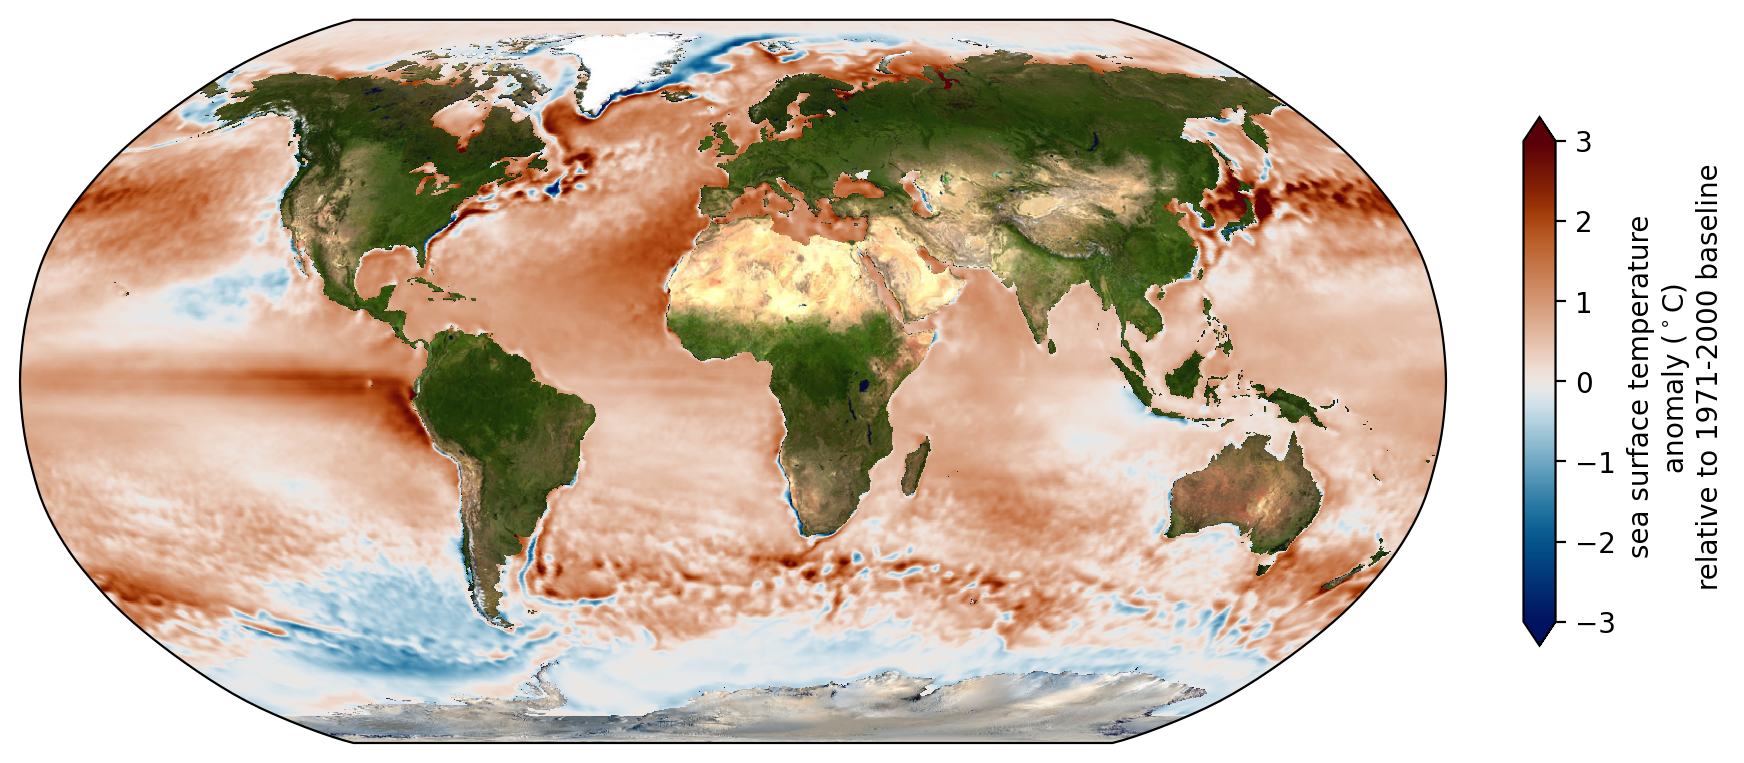

In [7]:
fig = plt.figure(figsize=(10, 5), dpi = 200)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

SST.plot(ax = ax, cmap = 'cmc.vik',transform=ccrs.PlateCarree(), 
         vmin = -3, vmax = 3,
         cbar_kwargs = {
             'label':'sea surface temperature \n anomaly ($^\circ$C) \n relative to 1971-2000 baseline',
             'fraction': 0.03,
             'aspect': 15,
            'shrink': 0.7
         })


# Add pretty land:
ax.imshow(blue_marble, extent=blue_marble_extent, transform=ccrs.PlateCarree(), origin='upper')

ax.set_title('')
plt.show()

### Plot the monthly and yearly averaged SST time-series



Download monthly SST from NOAA Climate at a Glance Global Time Series 

https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/ocean/all/1/1850-2023

    Time Scale: All Months

    Month: January

    Start Year: 1850

    End Year: 2023

    Region: Global

    Surface: Ocean

    "global and hemispheric anomalies are with respect to the 1901-2000 average"

Download as `.csv`, saving as `data.csv`.

In [8]:
global_SST = np.loadtxt('data.csv', skiprows = 5, delimiter = ',')

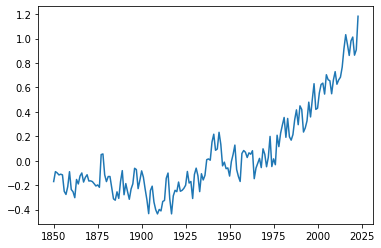

In [9]:
global_SST_yearly = np.zeros(2024-1850)
len_months = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
len_months_leap = np.array([31,29,31,30,31,30,31,31,30,31,30,31])

for i in np.arange(len(global_SST_yearly)):
    if (i+1850)% 4 == 0:
        global_SST_yearly[i] = np.dot(global_SST[i*12:i*12+12,1],len_months_leap)/366
    else:
        global_SST_yearly[i] = np.dot(global_SST[i*12:i*12+12,1],len_months)/365

plt.plot(np.arange(1850,2024), global_SST_yearly)

<BarContainer object of 2088 artists>

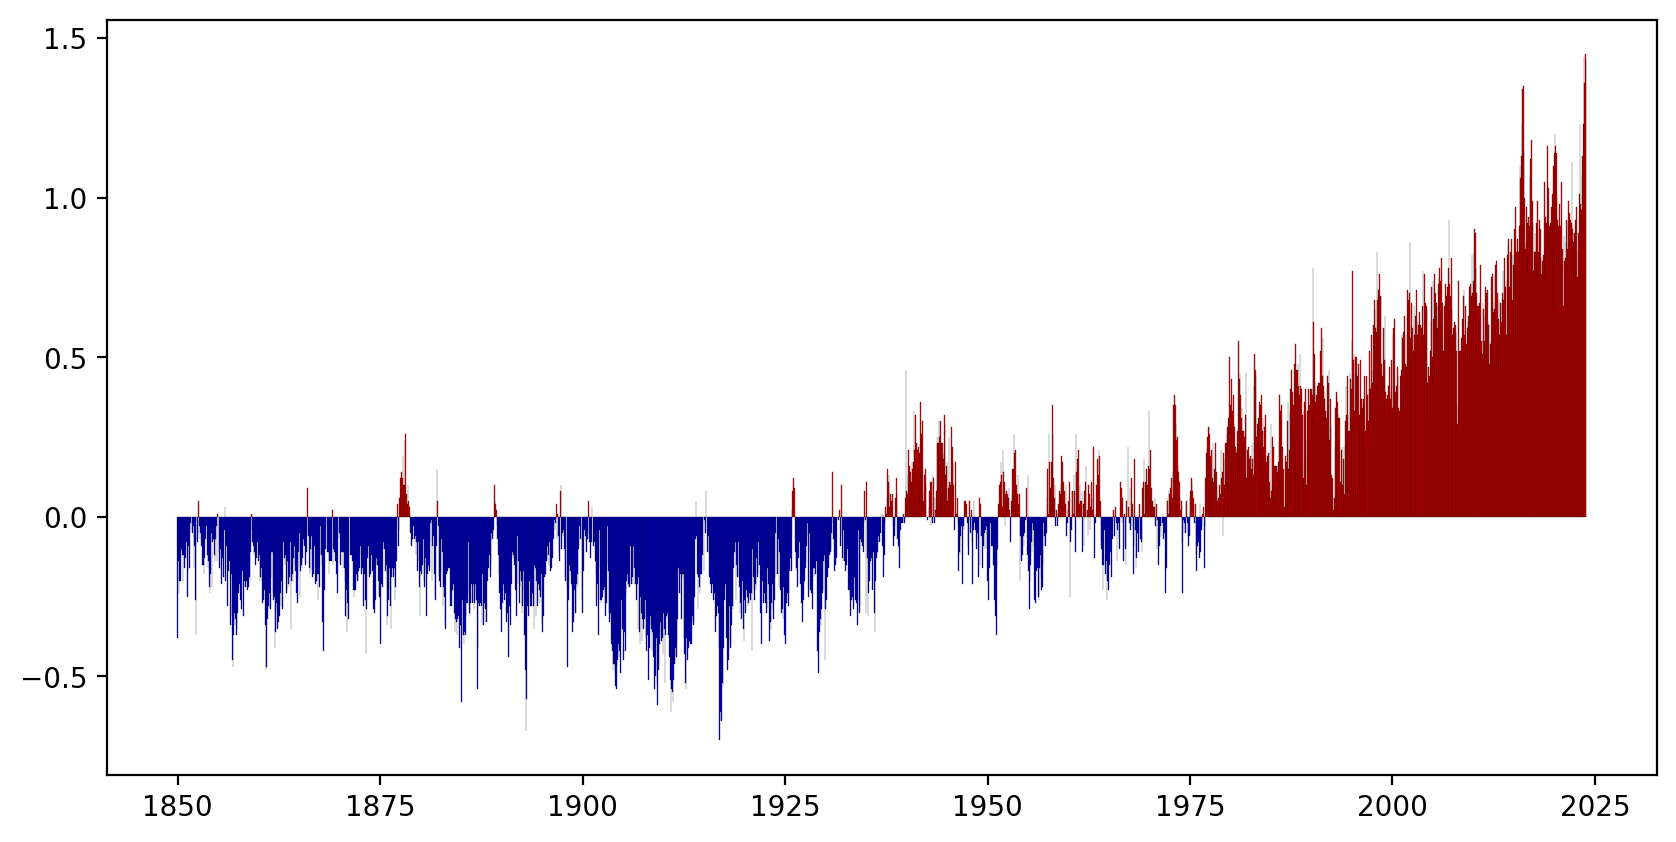

In [10]:
fig = plt.figure(figsize=(10, 5), dpi = 200)
color = np.where(global_SST[:,1]>0,'r','b')
times = np.arange(1850,2024,1/12)
plt.bar(times, global_SST[:,1], color = color, edgecolor = 'k', linewidth = 0.1,width=1/12)


The above data uses a 1901-2000 baseline average, we can do an earlier one by shifting the data by the average anomaly in 1850-1900. 

We can also make the bars annual sized to reduce noise and improve the colorbar:

Text(0.5, 0, 'Year')

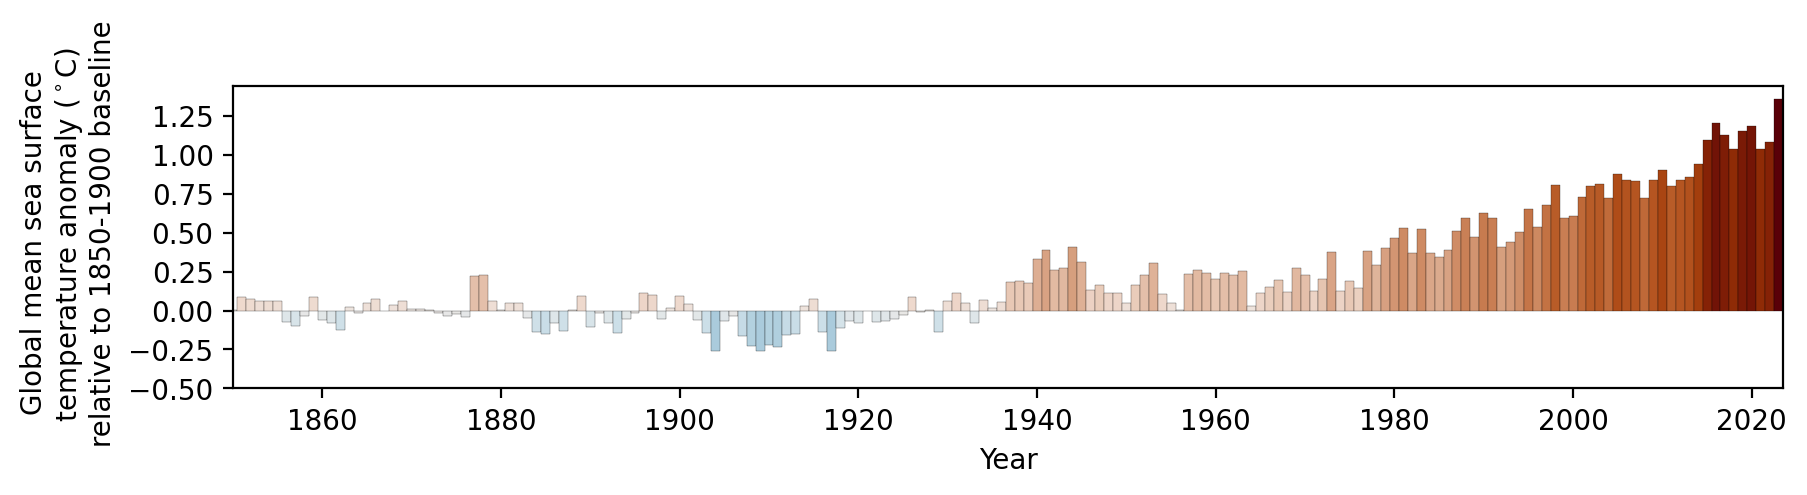

In [18]:
fig,ax = plt.subplots(figsize=(10, 2), dpi = 200)
# subtract anomaly from 1850-1900 to shift baseline
data  = global_SST_yearly -np.mean(global_SST_yearly[:50])
# Determine colour of bar by scaling from 0 to 1, where 0.5 equates to zero. So max(data)-> 1, 0 -> 0.5
data_color_scaled = 0.5+((data)/(2*max(data)))

my_cmap = plt.cm.get_cmap('cmc.vik')
color = my_cmap(data_color_scaled)

times = np.arange(1850,2024)
plt.bar(times, data, color = color, edgecolor = 'k', linewidth = 0.1,width=1)
plt.ylabel('Global mean sea surface \n temperature anomaly ($^\circ$C) \n relative to 1850-1900 baseline')
plt.yticks(np.arange(-0.5,1.5,0.25))
plt.xlim(1850,2023.5)
plt.xlabel('Year')


# Calculate sea ice extent from monthly data
https://nsidc.org/data/seaice_index

In [12]:
!mkdir snowice


In [13]:
# Load sea ice extent data in monthly csv files

for i in np.arange(1,13):

    if i<10:
        month = '0'+str(i)
    elif i ==10:
        month = '10'
    elif i ==11:
        month = '11'
    elif i ==12:
        month = '12'

    urlbase = 'https://noaadata.apps.nsidc.org/NOAA/G02135/south/monthly/data/'
    url = urlbase +'S_'+month+'_extent_v3.0.csv'
    print('Downloading from '+url)
    filename = 'snowice/S_'+month+'_extent_v3.0.csv'
    urlretrieve(url, filename)

Load extent in monthly data for years 1979-2023

In [14]:
extent = np.zeros(45*12)
for i in np.arange(1,13):
    print(i)

    if i<10:
        month = '0'+str(i)
    elif i ==10:
        month = '10'
    elif i ==11:
        month = '11'
    elif i ==12:
        month = '12'
    jan = np.loadtxt('snowice/S_'+month+'_extent_v3.0.csv', delimiter = ',', skiprows = 1,usecols=[0,4,5],)
    if i ==11 or i==12:
        jan = jan[1:,:]
    extent[(i-1)::12] = jan[:,1]


1
2
3
4
5
6
7
8
9
10
11
12


(0.0, 20.0)

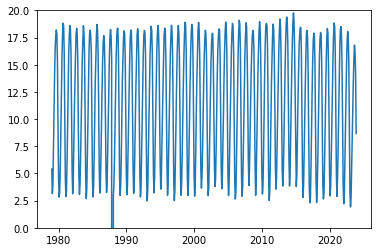

In [15]:
# Make a quick plot - you can see the clear seasonal cycle
plt.plot(np.arange(45*12)/12+1979, extent)
plt.ylim(0,20)

In [16]:
# Take annual average, and remove anomalies created by missing data (which was filled by -999)

extent_yr = np.zeros(45)
for i in np.arange(45):
    extent_yr[i] = np.sum(np.dot(extent[i*12:i*12+12],np.array([31,28,31,30,31,30,31,31,30,31,30,31])))/365
extent_yr[9] = np.nan
extent_yr[8] = np.nan


Text(0.5, 0, 'Year')

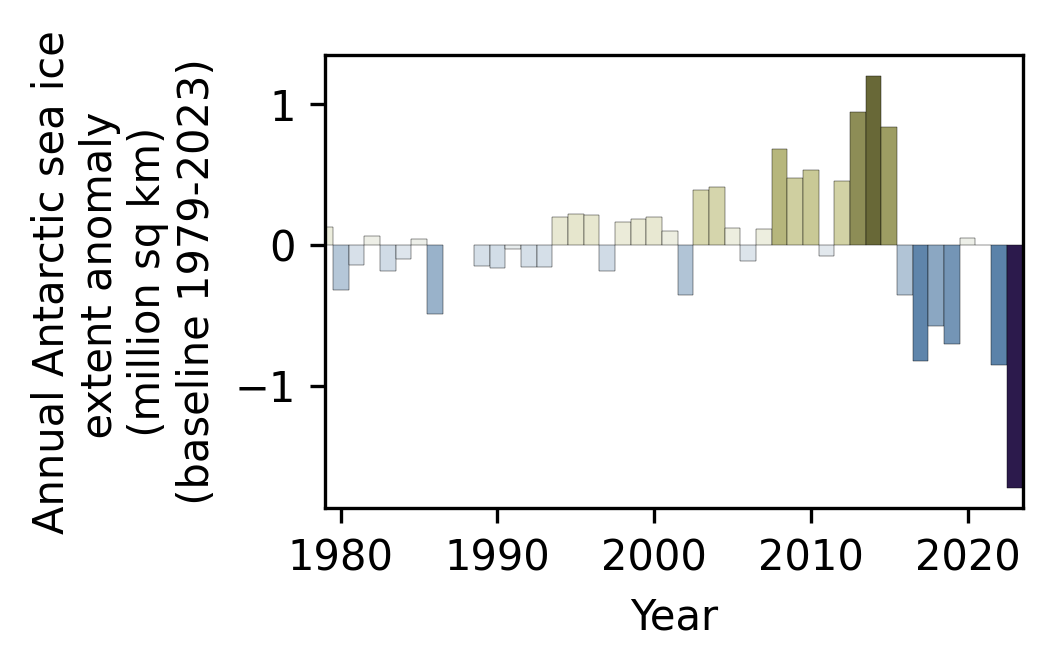

In [17]:
fig,ax = plt.subplots(figsize=(3, 2), dpi = 300)
# calculate anomaly wrt 
data  = extent_yr-np.nanmean(extent_yr)
# Determine colour of bar by scaling from 0 to 1, where 0.5 equates to zero. So max(data)-> 1, 0 -> 0.5
data_color_scaled = 0.5+((data)/(-2*min(data)))

my_cmap = plt.cm.get_cmap('cmc.broc')
color = my_cmap(data_color_scaled)

times = np.arange(45)+1979
plt.bar(times, extent_yr-np.nanmean(extent_yr), color = color, edgecolor = 'k', linewidth = 0.1,width=1)
plt.ylabel('Annual Antarctic sea ice\n  extent anomaly \n (million sq km) \n (baseline 1979-2023) ')
#plt.yticks(np.arange(-0.5,1.1,0.25))
plt.xlim(1979,2023.5)
plt.xlabel('Year')
#ax.set_facecolor('clear')


Assembled the final visualisation using Canva.


Short Description: 

My infographic-style visualisation uses earth observation data to demonstrate how 2023 was a year of climate extremes in the ocean. As well as record-breaking extreme heat over land and oceans (NOAA, 2024), the oceans themselves experienced a record-breaking sea surface temperature anomaly. This is important, because the ocean captures 93% of the world's excess anthropogenic heat (Levitus et al., 2012) and stores it in the deeper ocean. This came with record-low Antarctic sea ice extent (Purich et al., 2023). Both of these extremes in the ocean are concerning for the climate system, the biodiversity and life it supports, including humans. However, as shown by the sea surface temperature anomaly patterns, the world is not uniform and there are complex dynamics going on, such as the El Nino pattern in the Pacific Ocean or the Southern Ocean cooling. Thus, I created this visualisation to inform people about these extreme climate phenomena we are already seeing, in the hope of spurring on the Sustainable Development Goal of climate action. 

The data I used in this visualisation are:
- The NOAA 1/4° Daily Optimum Interpolation Sea Surface Temperature (OISST) (combines earth observations from multiple sources, including satellites) - https://www.ncei.noaa.gov/products/optimum-interpolation-sst and Huang, Boyin, Chunying Liu, Viva Banzon, Eric Freeman, Garrett Graham, Bill Hankins, Tom Smith, and Huai-Min Zhang. "Improvements of the daily optimum interpolation sea surface temperature (DOISST) version 2.1." Journal of Climate 34, no. 8 (2021): 2923-2939.
- The NOAA Merged Land Ocean Global Surface Temperature Analysis (NOAAGlobalTemp) timeseries of ocean surface temperatures, https://www.ncei.noaa.gov/products/land-based-station/noaa-global-temp
- NASA Blue Marble image from NASA Visible Earth, https://visibleearth.nasa.gov/collection/1484/blue-marble
- Sea Ice Index, v3 from the National Snow and Ice Data Centre (part of CIRES at the University of Colorado Boulder) https://nsidc.org/data/seaice_index from processed satellite data

I used python, including matplotlib and cmcrameri (a perceptually uniform colormap package designed for colour accessibility and scientific accuracy) to process the data and generate the plots, as well as Canva to assemble the infographic.


*References*:

National Oceanic and Atmospheric Administration (NOAA), 2024, https://www.noaa.gov/news/2023-was-worlds-warmest-year-on-record-by-far#:~:text=It's%20official%3A%202023%20was%20the,a%20record%20low%20in%202023. 

Levitus, Sydney, John I. Antonov, Tim P. Boyer, Olga K. Baranova, Hernan Eduardo Garcia, Ricardo Alejandro Locarnini, Alexey V. Mishonov et al. "World ocean heat content and thermosteric sea level change (0–2000 m), 1955–2010." Geophysical Research Letters 39, no. 10 (2012). https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012GL051106

Purich, Ariaan, and Edward W. Doddridge. "Record low Antarctic sea ice coverage indicates a new sea ice state." Communications Earth & Environment 4, no. 1 (2023): 314. https://www.nature.com/articles/s43247-023-00961-9

